In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
file_name = "/u/dutilfra/tmplisa4/transcriptome/graph/dataset.hdf5"
data = h5py.File(file_name, 'r')

In [3]:
# Our key:
print data.keys()

[u'expression_data', u'gene_names', u'graph_data', u'labels_data', u'sample_names']


In [4]:
# Examples:

for k in data.keys():
    print "For {}, shape: {}, ex: {}".format(k, data[k].shape, data[k][0])


For expression_data, shape: (10459, 16300), ex: [ 10.53180027   9.71609974   0.4657     ...,   9.36069965  13.78079987   0.        ]
For gene_names, shape: (16300,), ex: UBE2Q1
For graph_data, shape: (16300, 16300), ex: [ 0.  0.  0. ...,  0.  0.  0.]
For labels_data, shape: (10459, 29), ex: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
For sample_names, shape: (10459,), ex: TCGA-S9-A7J2-01


In [12]:
dict(data['labels_data'].attrs)

{u'0': 'Cervix',
 u'1': 'Testis',
 u'10': 'Rectum',
 u'11': 'Prostate',
 u'12': 'Liver',
 u'13': 'Lining of body cavities',
 u'14': 'Thymus',
 u'15': 'Uterus',
 u'16': 'Ovary',
 u'17': 'White blood cell',
 u'18': 'Soft tissue,Bone',
 u'19': 'Bile duct',
 u'2': 'Eye',
 u'20': 'Paraganglia',
 u'21': 'Endometrium',
 u'22': 'Brain',
 u'23': 'Thyroid Gland',
 u'24': 'Lung',
 u'25': 'Skin',
 u'26': 'Esophagus',
 u'27': 'Pancreas',
 u'28': 'Kidney',
 u'3': 'Head and Neck region',
 u'4': 'Adrenal gland',
 u'5': 'Stomach',
 u'6': 'Bladder',
 u'7': 'Lymphatic tissue',
 u'8': 'Breast',
 u'9': 'Colon',
 u'Adrenal gland': 4,
 u'Bile duct': 19,
 u'Bladder': 6,
 u'Brain': 22,
 u'Breast': 8,
 u'Cervix': 0,
 u'Colon': 9,
 u'Endometrium': 21,
 u'Esophagus': 26,
 u'Eye': 2,
 u'Head and Neck region': 3,
 u'Kidney': 28,
 u'Lining of body cavities': 13,
 u'Liver': 12,
 u'Lung': 24,
 u'Lymphatic tissue': 7,
 u'Ovary': 16,
 u'Pancreas': 27,
 u'Paraganglia': 20,
 u'Prostate': 11,
 u'Rectum': 10,
 u'Skin': 25,


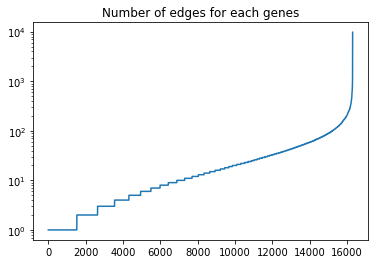

On average: 32.4732515337


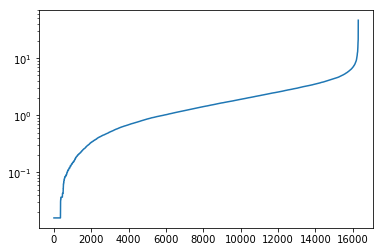

On average: 1.9301173687


In [5]:
nb_edges = (np.array(data['graph_data']) > 0.00).sum(axis=0)
plt.semilogy(np.sort(nb_edges))
plt.title("Number of edges for each genes")
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

nb_edges = (np.array(data['graph_data'])).sum(axis=0)
plt.semilogy(np.sort(nb_edges))
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

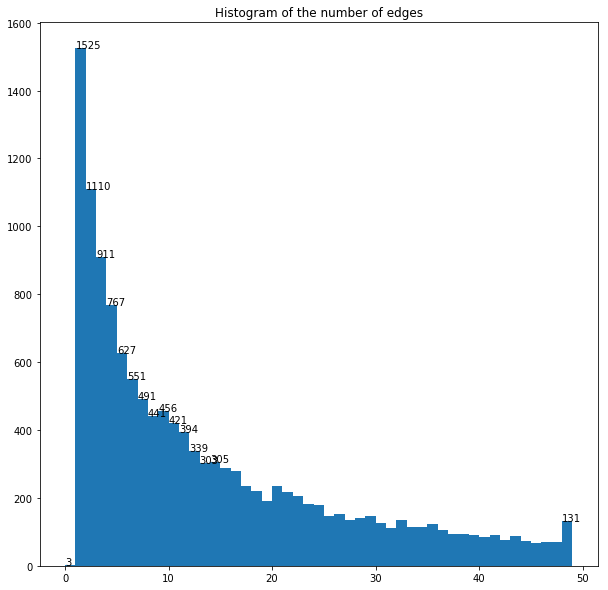

[   3 1525 1110  911  767  627  551  491  441  456]


In [120]:
# The histogram of edges
nb_edges = (np.array(data['graph_data']) > 0.0).sum(axis=0)

max_show = 50
my_bins =  range(max_show)
plt.figure(figsize=(10,10))
arr = plt.hist(np.minimum(nb_edges, max_show), bins=my_bins)#[0, 2, 5, 10, 100, 1000])
for i in range(15) + [max_show-2]:
    plt.text(arr[1][i], arr[0][i], str(int(arr[0][i])))
    
plt.title("Histogram of the number of edges")
plt.show()

    
print np.histogram(np.minimum(nb_edges, max_show), range(max_show))[0][:10]
# If we compare to an image, the number of neighbors is = filter_size **2 (i.e. usually 4, 9, 25)

In [104]:
a = (np.array(data['graph_data']) > 0.1).sum(axis=0)
arg_a = np.argsort(a)

for i in arg_a[-10:]:
    print "{}: {} edges.".format(data['gene_names'][i], a[i]) 

print "..."

for i in arg_a[:10]:
    print "{}: {} edges.".format(data['gene_names'][i], a[i]) 

FAF2: 55 edges.
EPB41L3: 56 edges.
TFAP2A: 59 edges.
CRK: 61 edges.
FOS: 63 edges.
CRY1: 64 edges.
CACNA1A: 70 edges.
VCL: 71 edges.
PXN: 74 edges.
CDC37: 83 edges.
...
COX6A1: 0 edges.
SDHD: 0 edges.
DOPEY1: 0 edges.
SLC17A2: 0 edges.
SLC17A6: 0 edges.
SLC17A5: 0 edges.
SLC17A4: 0 edges.
CILP2: 0 edges.
TSPY2: 0 edges.
DMRT2: 0 edges.
